<a href="https://colab.research.google.com/github/IronZiiz/python_SQL/blob/main/main_first_course_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Alt text: Slogan da Meteora.](https://i.imgur.com/VDYh2G1.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Estruturando a tabela

**Meteora** é uma loja que vende roupas e acessórios de diversas marcas por todos os estados do Brasil, para entender suas bases de dados e exibir informações relevantes com o objetivo de auxiliar suas tomadas de decisão.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [3]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [4]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [5]:
## Criando o banco de dados local
engine = create_engine('sqlite:///:memory:')

In [6]:
produtos.to_sql('produtos', engine, index = False)


205

In [7]:
itens_pedidos.to_sql('itens_pedidos', engine, index = False)
pedidos.to_sql('pedidos', engine, index = False)
vendedores.to_sql('vendedores', engine, index = False)

5

In [8]:
# Conferindo se estas tabelas estão dentro do Banco de dados de fato
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


# 2. Primeiras consultas

Vamos entender a característica do produto que é comercializadora na Meteora, analisando a **condição** dos produtos vendidos.

In [9]:
# Escrevendo a query
query = 'SELECT CONDICAO FROM PRODUTOS'

In [10]:
# Conectando a engine
with engine.connect() as conexao:
  consulta = conexao.execute(text(query))
  dados = consulta.fetchall()
pd.DataFrame(dados, columns = consulta.keys())

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [11]:
# Transfomando esse tipo de consulta em função, pois será usado varias vezes
def sql_df(query):
  with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
  return pd.DataFrame(dados, columns = consulta.keys())

In [12]:
query = '''SELECT CONDICAO, COUNT(*) AS 'Quantidade'
FROM PRODUTOS
GROUP BY CONDICAO;'''

df_produtos = sql_df(query)
df_produtos

,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


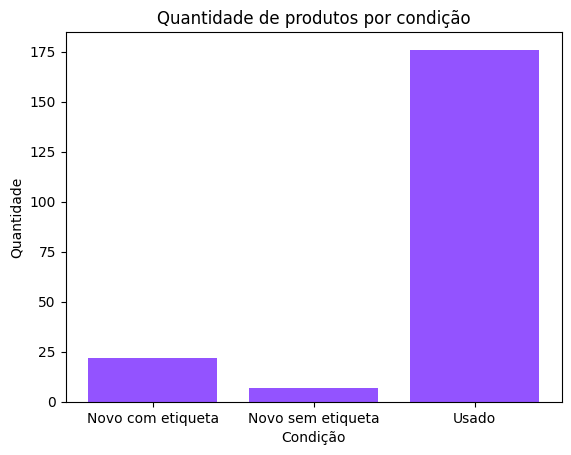

In [13]:
plt.bar(df_produtos['Condicao'],df_produtos['Quantidade'], color = '#9353FF')
plt.title('Quantidade de produtos por condição')
plt.xlabel('Condição')
plt.ylabel('Quantidade')
plt.show()

###Projeto com Pandas #1: selecionando colunas, agrupando e contando

 A ideia é que você conheça uma outra alternativa de solução e possa comparar a ferramenta (ou combinação de ferramentas)


In [14]:
# selecionar coluna Condicao
pd.DataFrame(produtos['Condicao'])

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [15]:
# contar as frequências
produtos.groupby('Condicao').size().reset_index(name='Quantidade')


,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


Agora precisamos ranquear os produtos que mais foram pedidos por **quantidade** para entender a necessidade de um estoque de produtos na loja.

In [16]:
sql_df('SELECT * FROM PRODUTOS').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [17]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [18]:
query = '''SELECT PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS quantidade
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
'''

sql_df(query)

,produto,quantidade
0,Bata Pink Decote,459
1,Bermuda Acetinada Preta,363
2,Bermuda Jeans Lavagem,395
3,Bermuda Listras Bolsos,402
4,Blazer Alfaiataria Grafite,433
...,...,...
196,Vestido Seda Floral,428
197,Vestido Textura Branco,470
198,Vestido Verde Estampa,423
199,Vestido Xadrez Pb,384


In [19]:
## limitando os pedidos que importamos
query = '''SELECT PRODUTOS.produto, SUM (ITENS_PEDIDOS.quantidade) AS 'Quantidade'
FROM PRODUTOS, ITENS_PEDIDOS
WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
GROUP BY PRODUTOS.produto
LIMIT 10;
'''
sql_df(query)

,produto,Quantidade
0,Bata Pink Decote,459
1,Bermuda Acetinada Preta,363
2,Bermuda Jeans Lavagem,395
3,Bermuda Listras Bolsos,402
4,Blazer Alfaiataria Grafite,433
5,Blazer Cinza E Azul Marinho,457
6,Blazer Nude Botao,485
7,Blusa Babados Cats,413
8,Blusa Babados Off-white,337
9,Blusa Cinza,341


In [20]:
# Retornando um conjunto específico dos dados com offset selecionando do 6 ao decimo
query = '''SELECT PRODUTOS.produto, SUM (ITENS_PEDIDOS.quantidade) AS 'Quantidade'
FROM PRODUTOS, ITENS_PEDIDOS
WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
GROUP BY PRODUTOS.produto
LIMIT 5 OFFSET 5;
'''
sql_df(query)

,produto,Quantidade
0,Blazer Cinza E Azul Marinho,457
1,Blazer Nude Botao,485
2,Blusa Babados Cats,413
3,Blusa Babados Off-white,337
4,Blusa Cinza,341


In [21]:
## Ranqueando valores
query = '''SELECT PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS quantidade
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY  Quantidade DESC
'''

sql_df(query)

,produto,quantidade
0,Vestido Recortes Cores,795
1,Calca Jeans Costuras,755
2,Saia Pregas Preta,751
3,Calca Alfaiataria Preta,750
4,Saia Midi Cinto,549
...,...,...
196,Blusa Cinza,341
197,Blusa Babados Off-white,337
198,Blusa Malha Azul,325
199,Blusa Listrada Malha,322


In [22]:
## Ranqueando valores
query = '''SELECT PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS Quantidade
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY  Quantidade ASC

'''

df_prod_quant = sql_df(query)
df_prod_quant

,produto,Quantidade
0,Vestido Malha Estampa,318
1,Blusa Listrada Malha,322
2,Blusa Malha Azul,325
3,Blusa Babados Off-white,337
4,Blusa Cinza,341
...,...,...
196,Saia Midi Cinto,549
197,Calca Alfaiataria Preta,750
198,Saia Pregas Preta,751
199,Calca Jeans Costuras,755


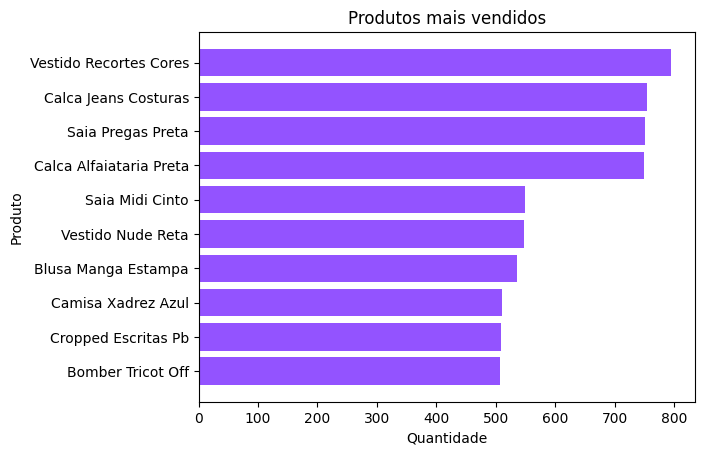

In [23]:
plt.barh(df_prod_quant['produto'][-10:], df_prod_quant['Quantidade'][-10:], color = '#9353FF')
plt.title('Produtos mais vendidos')
plt.xlabel('Quantidade')
plt.ylabel('Produto')
plt.show()

### Projeto com Pandas #2: selecionando e relacionando dados


In [24]:
#Parte 1: selecionar os dados
produtos.head(3)


,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [25]:
itens_pedidos.head(3)


,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [26]:
#Parte 2: relacionar os produtos por quantidade
df_prod_quant = itens_pedidos.merge(produtos, on='produto_id')
df_prod_quant = df_prod_quant.groupby('produto')['quantidade'].sum().reset_index()
df_prod_quant = df_prod_quant.sort_values('quantidade', ascending=True).reset_index(drop=True)
df_prod_quant

,produto,quantidade
0,Vestido Malha Estampa,318
1,Blusa Listrada Malha,322
2,Blusa Malha Azul,325
3,Blusa Babados Off-white,337
4,Blusa Cinza,341
...,...,...
196,Saia Midi Cinto,549
197,Calca Alfaiataria Preta,750
198,Saia Pregas Preta,751
199,Calca Jeans Costuras,755


## Desafio 1
calcular a receita total obtida com a venda de iten

In [27]:
sql_df('SELECT * FROM PRODUTOS').head(3)


,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [28]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [29]:
## Ranqueando valores
query = '''SELECT SUM(VALOR_TOTAL) AS RECEITA
FROM ITENS_PEDIDOS;
'''

df_prod_quant_desafio_1 = sql_df(query)
df_prod_quant_desafio_1

,RECEITA
0,45803930


## Desafio 2
identificar quais as 15 marcas que foram as mais pedidas por quantidades de venda.

In [30]:
## Ranqueando valores
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS 'Pedidos'
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.MARCA
ORDER BY  COUNT(*) ASC
'''

df_prod_quant_desafio_2 = sql_df(query)
df_prod_quant_desafio_2

,marca,Pedidos
0,Talie Nk,94
1,Track & Field,96
2,Ateliê de Calças,99
3,Bottega Veneta,101
4,Bcbgmaxzria,103
...,...,...
112,Banana Republic,584
113,Le Lis Blanc,715
114,Animale,1128
115,Mixed,1673


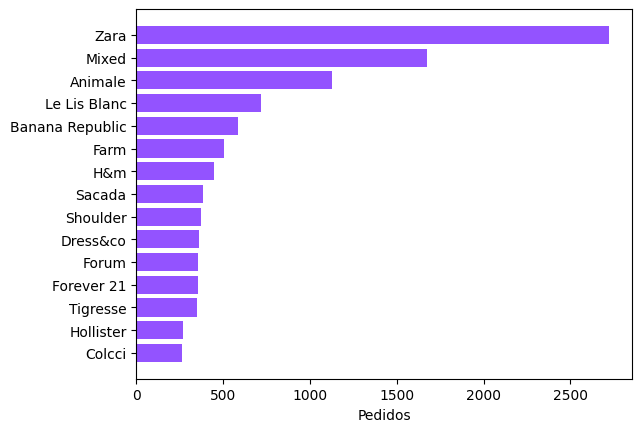

In [31]:
plt.barh(df_prod_quant_desafio_2['marca'][-15:], df_prod_quant_desafio_2['Pedidos'][-15:], color = '#9353FF')
plt.xlabel('Pedidos')
plt.show()

# 3. Lidando com filtro

Vamos iniciar uma análise de desempenho do **time de vendedores** da Meteora. A intenção aqui é entender como se deram as vendas dos vendedores no **ano anterior** para que possam ser aplicadas promoções e bônus salarial para a equipe no ano atual da tabela que é 2021

In [32]:
sql_df('SELECT * FROM PEDIDOS').head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [33]:
sql_df('SELECT * FROM PEDIDOS').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


Para entender o desempenho de vendas dos vendedores no ano de 2020, é preciso trabalhar com os dados que estão presentes apenas no ano de 2020.

In [34]:
# Filtrando dados temporais
query = '''SELECT *
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2020';
'''

sql_df(query)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,112772,84743,3,2020-01-01,720
1,112909,56350,3,2020-01-01,1225
2,113068,70673,2,2020-01-01,1050
3,113453,16634,3,2020-01-01,2880
4,114487,43054,1,2020-01-01,640
...,...,...,...,...,...
14540,26762,9981,4,2020-12-31,8000
14541,27016,20029,3,2020-12-31,1764
14542,27666,12895,5,2020-12-31,10400
14543,28206,29893,4,2020-12-31,2100


In [35]:
# Agrupando por vendedor contando quantas vezes venderam
query = '''SELECT VENDEDOR_ID, COUNT(*)
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY VENDEDOR_ID;
'''

sql_df(query)

,vendedor_id,COUNT(*)
0,1,3427
1,2,3338
2,3,2782
3,4,2510
4,5,2488


### Para saber mais função strftime
Filtrando os dados de venda mês a mês de dois anos consecutivos e realizando uma comparação


In [36]:
## Selecionar dados do ano de 2019 (venda mês a mês)
query = '''SELECT strftime('%m', data_compra) AS mes, COUNT(*) AS quantidade_vendas
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2019'
GROUP BY mes;
'''

vendas_19 = sql_df(query)
vendas_19

,mes,quantidade_vendas
0,01,141
1,02,333
2,03,501
3,04,456
4,05,650
5,06,567
6,07,738
7,08,745
8,09,802
9,10,866


In [37]:
## Selecionar dados do ano de 2020 (venda mês a mês)
query = '''SELECT strftime('%m', data_compra) AS mes, COUNT(*) AS quantidade_vendas
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY mes;
'''

vendas_20 = sql_df(query)
vendas_20

,mes,quantidade_vendas
0,01,1271
1,02,1197
2,03,1280
3,04,1276
4,05,1206
5,06,896
6,07,984
7,08,1163
8,09,1221
9,10,1139


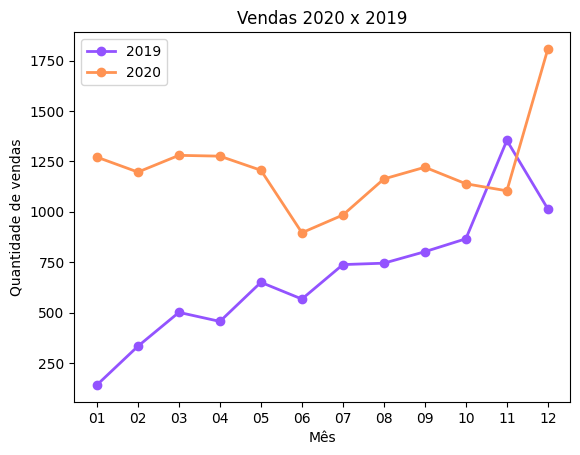

In [38]:
# comparando as compras nos dois anos

plt.plot(vendas_19['mes'], vendas_19['quantidade_vendas'], label='2019', color = '#9353FF',  marker='o', linewidth=2)
plt.plot(vendas_20['mes'], vendas_20['quantidade_vendas'], label='2020', color = '#FF9353', marker='o',linewidth=2)
plt.title('Vendas 2020 x 2019')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vendas')
plt.legend()
plt.show()

In [39]:
# Melhorando a visualização de vendedores
# Agrupando por vendedor contando quantas vezes venderam
query = '''SELECT VENDEDORES.NOME_VENDEDOR, COUNT(PEDIDOS.PEDIDO_ID) AS 'Quantidade vendas'
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y', data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY COUNT(PEDIDOS.PEDIDO_ID) DESC;
'''

sql_df(query)

,nome_vendedor,Quantidade vendas
0,Ana Duarte,3427
1,Daniel Siqueira,3338
2,Nadia Oliveira,2782
3,Millena Pereira,2510
4,Paulo Calanca,2488


In [40]:
# Media de vendas
query = '''SELECT VENDEDORES.NOME_VENDEDOR, AVG(PEDIDOS.TOTAL) AS 'Valor médio por vendas '
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y', data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY AVG(PEDIDOS.TOTAL) DESC;
'''

sql_df(query)

,nome_vendedor,Valor médio por vendas
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


###Projeto com Pandas #3: filtro em dado textual


In [41]:
df_filtrado = pedidos[pedidos['data_compra'].str.startswith('2020')]
df_mesclado = df_filtrado.merge(vendedores, on='vendedor_id')
df_agrupado = df_mesclado.groupby('nome_vendedor')['total'].mean().reset_index()
df_filtro_data = df_agrupado.sort_values('total', ascending=False).reset_index(drop=True)
df_filtro_data.columns = ['nome_vendedor', 'Valor médio por vendas']
df_filtro_data

,nome_vendedor,Valor médio por vendas
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


### Desafio 3
exibir os 10 produtos mais vendidos durante o ano de 2019,

In [42]:
# Filtrando dados temporais
query = '''SELECT PRODUTOS.PRODUTO, COUNT (PEDIDOS.PEDIDO_ID) AS TOTAL_PEDIDOS
FROM PEDIDOS, PRODUTOS
WHERE strftime('%Y', data_compra) = '2019' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY TOTAL_PEDIDOS DESC
LIMIT 10;
'''

sql_df(query)

,produto,TOTAL_PEDIDOS
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
5,Bomber Tricot Off,56
6,Shorts Bordado Branco,55
7,Blusa Manga Estampa,54
8,Saia Midi Cinto,53
9,Saia Evase Cinza,53


### Desafio 4
publicar a distribuição através dos meses da receita obtida em vendas no ano de 2021

In [43]:
## Selecionar dados do ano de 2019 (venda mês a mês)
query = '''SELECT strftime('%m', data_compra) AS mes, SUM(total) AS receita
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2021'
GROUP BY mes;
'''

vendas_21 = sql_df(query)
vendas_21

,mes,receita
0,01,2097109
1,02,1140729
2,03,51525


# 4. Avançando nas relações

A Meteora agora deseja incrementar as suas vendas no **estado de São Paulo (SP)**, por acreditar ser uma região mais propícia às vendas já que tem uma boa concentração de pessoas e mercado também.

Mas será que São Paulo já não rende muitas vendas em relação a outros estados?

In [45]:
query = '''
SELECT ESTADO, COUNT(*) AS Pedidos
FROM ITENS_PEDIDOS

GROUP BY ESTADO
ORDER BY Pedidos DESC;
'''
sql_df(query)

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


### Projeto com Pandas #4: contagem por estados


In [46]:
df_agrupados = itens_pedidos.groupby('Estado').size().reset_index(name='Pedidos')
df_estados = df_agrupados.sort_values('Pedidos', ascending=False).reset_index(drop=True)
df_estados

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RO,925
8,BR-RR,925
9,BR-RN,921


Uma das ações que a Meteora pretende seguir para as vendas em SP é escolher dois de seus vendedores para que eles **foquem suas vendas** lá. Para essa escolha é interessante ter os profissionais que **mais tenham vendido** para as pessoas da região.

In [47]:
query  = '''
SELECT PEDIDOS.VENDEDOR_ID, COUNT(*) AS quantidade_vendas
FROM  PEDIDOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
GROUP BY PEDIDOS.VENDEDOR_ID
ORDER BY quantidade_vendas DESC;
'''
sql_df(query)


,vendedor_id,quantidade_vendas
0,5,5283
1,1,5167
2,2,5032
3,3,4840
4,4,4205


In [49]:
# Adcionando filtro em SP
query  = '''
SELECT PEDIDOS.VENDEDOR_ID, COUNT(*) AS quantidade_vendas
FROM  PEDIDOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PEDIDOS.VENDEDOR_ID
ORDER BY quantidade_vendas DESC;
'''
sql_df(query)

,vendedor_id,quantidade_vendas
0,2,190
1,5,182
2,3,181
3,1,180
4,4,157


In [50]:
# trazendo os nomes dos vendedores
query  = '''
SELECT VENDEDORES.NOME_VENDEDOR, COUNT(*) AS quantidade_vendas
FROM  PEDIDOS
JOIN VENDEDORES ON VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY quantidade_vendas DESC
'''
sql_df(query)

,nome_vendedor,quantidade_vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157


### Projeto com Pandas #5: agrupando dados


In [51]:
df_unido = pedidos.merge(vendedores, on='vendedor_id').merge(itens_pedidos, on='pedido_id')
df_filtrado = df_unido.query("Estado == 'BR-SP'")
df_vendedores_sp = df_filtrado.groupby('nome_vendedor').size().reset_index(name='quantidade_vendas')
df_vendedores_sp = df_vendedores_sp.sort_values('quantidade_vendas', ascending=False)
df_vendedores_sp

,nome_vendedor,quantidade_vendas
1,Daniel Siqueira,190
4,Paulo Calanca,182
3,Nadia Oliveira,181
0,Ana Duarte,180
2,Millena Pereira,157


### Desafio 5
A primeira informação é listar as marcas vendidas em São Paulo por quantidade de pedidos, que podem ser representadas em uma tabela.

In [72]:
query  = '''
SELECT PRODUTOS.MARCA AS MARCA,
COUNT(ITENS_PEDIDOS.PEDIDO_ID) AS QUANTIDADE_PEDIDOS
FROM ITENS_PEDIDOS
JOIN PRODUTOS ON PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PRODUTOS.MARCA
ORDER BY QUANTIDADE_PEDIDOS DESC
'''
sql_df(query)

,MARCA,QUANTIDADE_PEDIDOS
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1


### Desafio 6
 publicar os produtos que são mais vendidos na época de Natal no Brasil todo. Essa última informação é aplicada a todos os estados porque somente o estado de São Paulo pode não trazer uma quantidade relevante de informações.

In [78]:
query = '''SELECT
    PRODUTOS.PRODUTO,
    COUNT(PEDIDOS.PEDIDO_ID) AS TOTAL_PEDIDOS
FROM
    PEDIDOS
JOIN
    PRODUTOS ON PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE
    strftime('%m', data_compra) = '12'
GROUP BY
    PRODUTOS.PRODUTO
ORDER BY
    TOTAL_PEDIDOS DESC;

'''

sql_df(query)

,produto,TOTAL_PEDIDOS
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
...,...,...
196,Sneaker Monograma Bege,6
197,Casaqueto Estampa Geometrica,6
198,Regata Renda Branca,5
199,Body Estampa Coracoes,5
